      Tank2OutFlow  Tank2.puddle  Tank3OutFlow  Tank2.level  wt3_valve
time                                                                  
0.00           0.0      0.022568           0.0          0.0          0
0.05           0.0      0.022568           0.0          0.0          0
0.10           0.0      0.022568           0.0          0.0          0
0.15           0.0      0.022568           0.0          0.0          0
0.20           0.0      0.022568           0.0          0.0          0
Training MSE: 1.2031713924569865e-31
Training MAE: 2.873137557554641e-16
Training R^2: 1.0
Testing MSE: 1.3925327042346918e-31
Testing MAE: 3.0802122302662624e-16
Testing R^2: 1.0


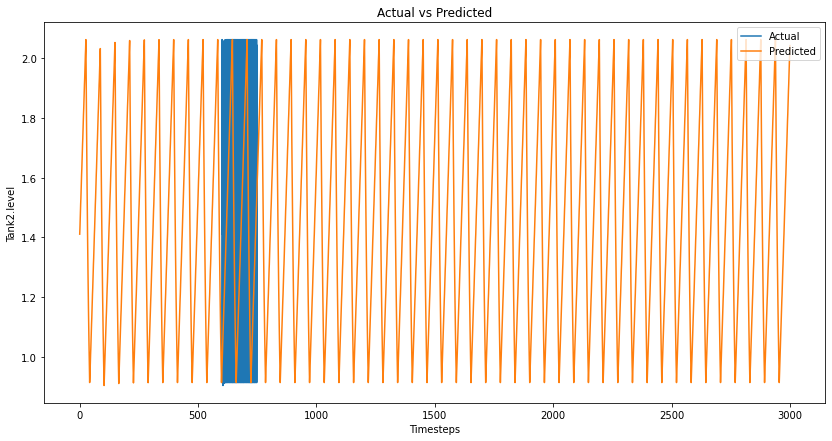

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def mean_sq_error(y_true, y_pred):
    if not np.shape(y_true) == np.shape(y_pred):
        raise ValueError("y_true and y_pred must have the same shape.")
    sq_errors = np.square(y_true - y_pred)
    return np.mean(sq_errors)



# Load the dataset
# Replace 'your_data.csv' with your file path
file_name = 'waterTank_Golden_reduced.csv'
# data = pd.read_csv(file_name, index_col=0, header=0, parse_dates=True)
data = pd.read_csv(file_name, index_col=0, header=0)
data.index.freq = 'ms'
# Preview the data
print(data.head())

# Assume 'date' is the index column and it's datetime
# data['time'] = pd.to_datetime(data['time'])
# data.set_index('time', inplace=True)

# Define the features (X) and the target (y)
# Assuming the target column is named 'target'
features = ['Tank2OutFlow', 'Tank2.puddle', 'Tank3OutFlow', 'Tank2.level', 'wt3_valve']  # Replace with your actual feature columns
X = data[features]
# y = data['Tank3OutFlow']
# target = 'Tank2OutFlow'
target = 'Tank2.level'
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# print(f'Training MSE: {mse_train:.4f}')
# print(f'Training R^2: {r2_train:.4f}')
# print(f'Testing MSE: {mse_test:.4f}')
# print(f'Testing R^2: {r2_test:.4f}')

print(f'Training MSE: {mse_train}')
print(f'Training MAE: {mae_train}')
print(f'Training R^2: {r2_train}')
print(f'Testing MSE: {mse_test}')
print(f'Testing MAE: {mae_test}')
print(f'Testing R^2: {r2_test}')

# Plot the results
plt.figure(figsize=(14, 7))
# plt.plot(y_test.index, y_test, label='Actual')
# plt.plot(y_test.index, y_pred_test, label='Predicted')
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Timesteps')
plt.ylabel(target)
plt.show()


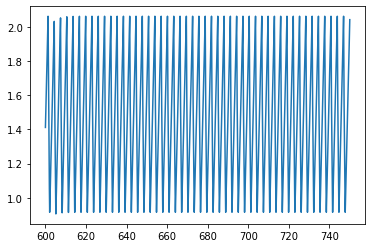

In [51]:
plt.plot(y_test)

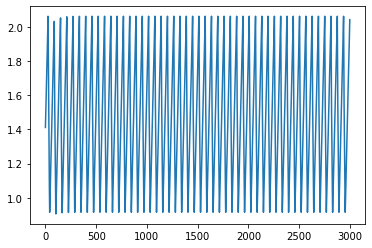

In [52]:
plt.plot(y_pred_test)

In [53]:
y_true = np.array([1,3,2,5])
y_pred = np.array([2,2,4,4])
mse = mean_sq_error(y_true, y_pred)
mse_built = mean_squared_error(y_true, y_pred)

print(mse)
print(mse_built)

1.75
1.75


In [54]:
val1 = mean_squared_error(y_train, y_pred_train)
val2 = mean_sq_error(y_train, y_pred_train)
print(val1, val2)

1.2031713924569865e-31 1.2031713924569865e-31


In [55]:
data[target].describe()

count    15001.000000
mean         1.444786
std          0.359002
min          0.000000
25%          1.160903
50%          1.440757
75%          1.741081
max          2.073883
Name: Tank2.level, dtype: float64